In [1]:
import requests
import re
from bs4 import BeautifulSoup
from collections import defaultdict
import networkx as nx

# get data from web page

In [2]:
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}

url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
source_code = requests.get(url, headers=headers).content.decode('utf8')

In [3]:
better_page = BeautifulSoup(source_code, 'html.parser')

In [4]:
tables = better_page.find_all("table")

In [5]:
subway_url = {}
reg_rxp = re.compile(r'北京地铁.*线')
for table in tables:
    for a in table.find_all('a'):
        if a.has_attr('href') and reg_rxp.search(a.get_text()):
            line = a.get_text().replace("北京地铁", "")
            subway_url[line] = 'https://baike.baidu.com' + a.get('href')
    if subway_url:
        break
subway_url

{'1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '2号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
 '4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '6号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 '7号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
 '8号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '9号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 '10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 '14号线': 'https://baike.baidu.com/it

In [6]:
station_connection = defaultdict(list)
station_distance = defaultdict(int)
station_line = defaultdict(set)
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
for subway_url_i, url_i in subway_url.items():
    print("process {}".format(subway_url_i))
    source_code = requests.get(url_i, headers=headers).content.decode('utf8')
    better_page = BeautifulSoup(source_code, 'html.parser')
    cities = better_page.find_all("th", string=re.compile("(.+)——(.+)"))
    for city in cities:
        c1, c2 = city.get_text().split("——")
        distance = re.search("([0-9]+)米?", cities[0].next_sibling.get_text()).groups()[0]
        station_connection[c1].append(c2)
        station_connection[c2].append(c1)
        station_distance[(c1, c2)] = int(distance)
        station_line[c1].add(subway_url_i)
        station_line[c2].add(subway_url_i)

process 1号线
process 2号线
process 4号线
process 5号线
process 6号线
process 7号线
process 8号线
process 9号线
process 10号线
process 13号线
process 14号线
process 15号线
process 16号线
process 八通线
process 昌平线
process 亦庄线
process 房山线


In [7]:
station_line

defaultdict(set,
            {'苹果园': {'1号线'},
             '古城': {'1号线'},
             '八角游乐园': {'1号线'},
             '八宝山': {'1号线'},
             '玉泉路': {'1号线'},
             '五棵松': {'1号线'},
             '万寿路': {'1号线'},
             '公主坟': {'10号线', '1号线'},
             '军事博物馆': {'1号线', '9号线'},
             '木樨地': {'1号线'},
             '南礼士路': {'1号线'},
             '复兴门': {'1号线', '2号线'},
             '西单': {'1号线', '4号线'},
             '天安门西': {'1号线'},
             '天安门东': {'1号线'},
             '王府井': {'1号线'},
             '东单': {'1号线', '5号线'},
             '建国门': {'1号线', '2号线'},
             '永安里': {'1号线'},
             '国贸': {'10号线', '1号线'},
             '大望路': {'14号线', '1号线'},
             '四惠': {'1号线', '八通线'},
             '四惠东': {'1号线', '八通线'},
             '西直门': {'13号线', '2号线', '4号线'},
             '车公庄': {'2号线', '6号线'},
             '阜成门': {'2号线'},
             '长椿街': {'2号线'},
             '宣武门': {'2号线', '4号线'},
             '和平门': {'2号线'},
             '前门': {'2号线'},
          

In [8]:
station_connection

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['车公庄', 

In [9]:
station_distance

defaultdict(int,
            {('苹果园', '古城'): 2606,
             ('古城', '八角游乐园'): 2606,
             ('八角游乐园', '八宝山'): 2606,
             ('八宝山', '玉泉路'): 2606,
             ('玉泉路', '五棵松'): 2606,
             ('五棵松', '万寿路'): 2606,
             ('万寿路', '公主坟'): 2606,
             ('公主坟', '军事博物馆'): 2606,
             ('军事博物馆', '木樨地'): 2606,
             ('木樨地', '南礼士路'): 2606,
             ('南礼士路', '复兴门'): 2606,
             ('复兴门', '西单'): 2606,
             ('西单', '天安门西'): 2606,
             ('天安门西', '天安门东'): 2606,
             ('天安门东', '王府井'): 2606,
             ('王府井', '东单'): 2606,
             ('东单', '建国门'): 2606,
             ('建国门', '永安里'): 2606,
             ('永安里', '国贸'): 2606,
             ('国贸', '大望路'): 2606,
             ('大望路', '四惠'): 2606,
             ('四惠', '四惠东'): 1715,
             ('西直门', '车公庄'): 909,
             ('车公庄', '阜成门'): 909,
             ('阜成门', '复兴门'): 909,
             ('复兴门', '长椿街'): 909,
             ('长椿街', '宣武门'): 909,
             ('宣武门', '和平门'): 909,
     

In [10]:
station_connection2 = {key:set(l) for key, l in station_connection.items()}

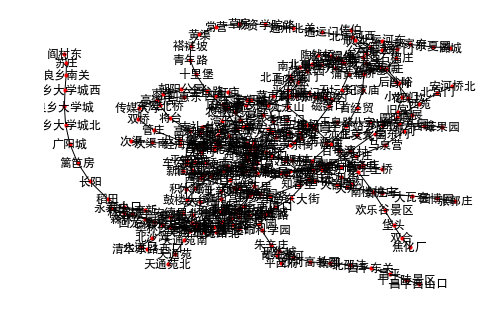

In [10]:
city_graph = nx.Graph(station_connection2)
nx.draw(city_graph, with_labels=True, node_size=10)

In [14]:
def get_distance(c1, c2):
    assert((c1, c2) in station_distance or (c2, c1) in station_distance)
    if (c1, c2) in station_distance:
        return station_distance[(c1, c2)]
    else: 
        return station_distance[(c2, c1)]

In [15]:
get_distance("古城", "苹果园")

2606

# 重新排版代码：
# create "path" object that store all the path information
# it has following members: start, destination, station_num, transfers_num, path, transfer_info
# it has following methods: get_distance(station1, station2) 
# update_info(): when a new station is added to the path
# udpate_transfer_info(): when a new station is added to the path
# plot_info(): plot basic information about a path

In [420]:
from functools import reduce
from operator import add
from collections import Counter
from itertools import permutations
import copy

In [421]:
class path:
    def __init__(self, start, distance=0, station_num=1, transfers_num=0, path=None, transfer_info=None):
        self.start = start
        self.distance = distance
        self.station_num = station_num
        self.transfers_num = transfers_num
        if not path:
            self.path = [start]
        else:
            self.path = path
        if not transfer_info:
            self.transfer_info = [((start, start), station_line[start])]
        else:
            self.transfer_info = transfer_info
        
    def get_distance(self, c1, c2):
        assert((c1, c2) in station_distance or (c2, c1) in station_distance)
        if (c1, c2) in station_distance:
            return station_distance[(c1, c2)]
        else: 
            return station_distance[(c2, c1)]
    
    def update_info(self, next_station, curr_transfer_info):
        self.distance += self.get_distance(self.path[-1], next_station)
        self.station_num += 1
        self.path = self.path + [next_station]
        #print(curr_transfer_info, next_station)
        self.transfer_info = self.update_transfer_info(curr_transfer_info, next_station)
        self.transfer_num = len(self.transfer_info)
        
    def update_transfer_info(self, curr_transfer_info, next_station):
        #换乘信息           
        (line_start, line_end), which_line = curr_transfer_info
        if station_line[next_station].issuperset(which_line):
            new_line = self.transfer_info + [((line_start, next_station), which_line)]
        elif station_line[next_station].intersection(which_line):
            update_line = station_line[next_station].intersection(which_line)
            new_line = self.transfer_info + [((line_start, next_station), update_line)]
        else:
            line_start_new, line_end_new = line_end, next_station
            new_line = station_line[line_start_new].intersection(station_line[line_end_new])
            new_line = self.transfer_info + [((line_start, line_end), which_line), ((line_start_new, line_end_new), new_line)]
        return new_line
    
    def plot_info(self):
        print("\t\t路线：{}".format(self.path))
        print("\t\t换乘：{}次".format(self.transfer_num))
        print("\n".join(["\t\t从 " + start + " 乘坐" + "或".join(line)+"到 "+end+" 下车" for (start, end), line in self.transfer_info]))
        print("\t\t距离:{}米".format(self.distance))
        print("\t\t车站数:{}个".format(self.station_num))
        print("\t\t估计时间:{:.1f}分钟".format(5 * self.transfer_num + 2 * (self.distance * 1.0 / 1000)))
        return

          
        

# this its main body of search_distance functions
# some short function are listed first


In [441]:
def get_successor(dot, graph):
    return graph[dot]

def get_path_distance(path):
    return reduce(add, [get_distance(path[i], path[i+1]) for i in range(len(path)-1)])

def is_goal(next_station, destination):
    return True if next_station == destination else False

#this is to initiate structure when "by_way" is provided
#[(start, by_way1, by_way2,.., destination), path(start)]
#here stores all possible ways of a valite path when by_way is provided
def init_path_structure(start, by_way, destination):   
    return [([start]+list(i)+[destination], [path(start)]) for i in permutations(by_way)]

def shortest_distance(pathes):
    return sorted(pathes, key=lambda x:x.distance)

def smallest_stations(pathes):
    return sorted(pathes, key=lambda x:x.station_num)

def minimun_transfer(pathes):
    return sorted(pathes, key=lambda x:x.transfer_num)

def minimun_time(pathes):
    #时间=换乘次数*5 + 千米数*2
    return sorted(pathes, key=lambda x:5*x.transfer_num + 2* (x.distance*1.0/1000) )

def comprehensive_path(pathes):
    #换乘次数 + 车站数量/5
    return sorted(pathes, key=lambda x:x.transfer_num+x.station_num*1.0/5)

def comprehensive_path2(pathes):
    #换乘次数 + 路线距离/2500
    return sorted(pathes, key=lambda x:x.transfer_num+x.distance*1.0/2500)

# Two functions are listed below
# 1. search_distance() function, this is the basic function taught in class.
# inputs: station_graph, destination, strategy_func, travelled_path_raw

# "travelled_path_raw" is the path that I have travelled already. The stations on "travelled_path_raw" will be in "seen".

# 2. travelled_distance_by_way() function adds one more arguments "by_way". 
# I use this function to initiate all possible path order first and then pass each part of one possible path to "search_distance()" function to concat them together

# for example, if start = "苹果园", destination = "顺义", by_way = ["雍和宫", "复兴门"]
# first, genenrate possible structure of a path: ["苹果园","雍和宫", "复兴,"顺义" ] or ["苹果园", "复兴,"雍和宫","顺义"]
# second, based on each part of the path, generate a valid sub-path then concat them together
# the program will avoid duplicate stations on one path


In [467]:
def search_distance(station_graph, destination, strategy_func, travelled_path_raw):
    #distance, number of stations, number of transfer, 
    #pathes_info = [(0, 1, 0, [start], [((start, start), station_line[start])])]
    travelled_path = copy.deepcopy(travelled_path_raw)
    pathes_info = [travelled_path]
    seen = set(travelled_path.path[:-1])
    validate_path = []
    #print(seen)
    while pathes_info:
        curr_path = pathes_info.pop(0)
        current_station = curr_path.path[-1]
        #print(current_station)
        if current_station in seen:
            continue
        seen.add(current_station)
        curr_transfer_info = curr_path.transfer_info.pop()
        for next_station in get_successor(current_station, station_connection):
            if next_station in seen:
                continue
            #update inforamtion
            new_path = copy.deepcopy(curr_path)
            new_path.update_info(next_station, curr_transfer_info)
            
            if is_goal(next_station, destination):
                validate_path.append(new_path)
            else:
                pathes_info.append(new_path)
        pathes_info = strategy_func(pathes_info)
        #print([(p[2], p[1], p[3]) for p in pathes_info[:3]])
    validate_path = strategy_func(validate_path)
    #if len(validate_path) > 0:
    #    for v_path in validate_path:
    #        #print("="*10)
    #        #v_path.plot_info()
    #else:
    #    print("No Validated path!")
    return validate_path

def search_distance_by_way(station_graph, start, destination, strategy_func, by_way):
    if start not in station_graph or destination not in station_graph:
        print("Please provide valid start and sestination.")
        return 
    all_pathes = init_path_structure(start, by_way, destination)
    all_pathes_tmp = copy.deepcopy(all_pathes)
    final_path = []
    while all_pathes_tmp:
        stops, past_path = all_pathes_tmp.pop(0)
        start, end = stops[0], stops[1]
        res = []
        #print(start, end, past_path[0].plot_info())
        for p in past_path:
            res.extend(search_distance(station_connection, end, strategy_func, p))
        if len(stops) > 2:
            all_pathes_tmp.append(([end]+stops[2:], res))
        else:
            final_path.extend(res)
    #print(len(final_path))
    final_path = strategy_func(final_path)
    final_path = final_path[:2]
    for p in final_path:
        print("="*10)
        p.plot_info()

# tests and results

In [444]:
#shortest_distance
#smallest_stations
#minimun_transfer
#minimun_time
#comprehensive_path

In [448]:
#distance, number of stations, number of transfer 
search_distance_by_way(station_connection, "苹果园", "顺义", smallest_stations, ["雍和宫", "复兴门"])

		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '柳芳', '光熙门', '芍药居', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：4次
		从 苹果园 乘坐1号线到 复兴门 下车
		从 复兴门 乘坐2号线到 东直门 下车
		从 东直门 乘坐13号线到 望京西 下车
		从 望京西 乘坐15号线到 顺义 下车
		距离:59878米
		车站数:35个
		估计时间:139.8分钟
		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫', '东直门', '柳芳', '光熙门', '芍药居', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：7次
		从 苹果园 乘坐1号线到 复兴门 下车
		从 复兴门 乘坐2号线到 车公庄 下车
		从 车公庄 乘坐6号线到 东四 下车
		从 东四 乘坐5号线到 雍和宫 下车
		从 雍和宫 乘坐2号线到 东直门 下车
		从 东直门 乘坐13号线到 望京西 下车
		从 望京西 乘坐15号线到 顺义 下车
		距离:64182米
		车站数:37个
		估计时间:163.4分钟


In [449]:
search_distance_by_way(station_connection, "苹果园", "顺义", shortest_distance, ["雍和宫", "复兴门"])

		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '芍药居', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：6次
		从 苹果园 乘坐1号线到 复兴门 下车
		从 复兴门 乘坐2号线到 雍和宫 下车
		从 雍和宫 乘坐5号线到 惠新西街南口 下车
		从 惠新西街南口 乘坐10号线到 芍药居 下车
		从 芍药居 乘坐13号线到 望京西 下车
		从 望京西 乘坐15号线到 顺义 下车
		距离:54379米
		车站数:35个
		估计时间:138.8分钟
		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '北京西站', '湾子', '达官营', '广安门内', '菜市口', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '芍药居', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：9次
		从 苹果园 乘坐1号线到 军事博物馆 下车
		从 军事博物馆 乘坐9号线到 北京西站 下车
		从 北京西站 乘坐7号线到 菜市口 下车
		从 菜市口 乘坐4号线到 宣武门 下车
		从 宣武门 乘坐2号线到 雍和宫 下车
		从 雍和宫 乘坐5号线到 惠新西街南口 下车
		从 惠新西街南口 乘坐10号线到 芍药居 下车
		从 芍药居 乘坐13号线到 望京西 下车
		从 望京西 乘坐15号线到 顺义 下车
		距离:54578米
		车站数:40个
		估计时间:154.2分钟


In [450]:
search_distance_by_way(station_connection, "苹果园", "顺义", minimun_transfer, ["雍和宫", "复兴门"])

		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '关庄', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：3次
		从 苹果园 乘坐1号线到 东单 下车
		从 东单 乘坐5号线到 大屯路东 下车
		从 大屯路东 乘坐15号线到 顺义 下车
		距离:65958米
		车站数:40个
		估计时间:146.9分钟
		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '关庄', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：4次
		从 苹果园 乘坐1号线到 建国门 下车
		从 建国门 乘坐2号线到 雍和宫 下车
		从 雍和宫 乘坐5号线到 大屯路东 下车
		从 大屯路东 乘坐15号线到 顺义 下车
		距离:67505米
		车站数:40个
		估计时间:155.0分钟


In [451]:
search_distance_by_way(station_connection, "苹果园", "顺义", minimun_time, ["雍和宫", "复兴门"])

		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '关庄', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：4次
		从 苹果园 乘坐1号线到 复兴门 下车
		从 复兴门 乘坐2号线到 雍和宫 下车
		从 雍和宫 乘坐5号线到 大屯路东 下车
		从 大屯路东 乘坐15号线到 顺义 下车
		距离:54596米
		车站数:37个
		估计时间:129.2分钟
		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '长椿街', '宣武门', '和平门', '前门', '崇文门', '北京站', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '关庄', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：4次
		从 苹果园 乘坐1号线到 复兴门 下车
		从 复兴门 乘坐2号线到 雍和宫 下车
		从 雍和宫 乘坐5号线到 大屯路东 下车
		从 大屯路东 乘坐15号线到 顺义 下车
		距离:58232米
		车站数:41个
		估计时间:136.5分钟


In [452]:
search_distance_by_way(station_connection, "苹果园", "顺义", comprehensive_path, ["雍和宫", "复兴门"])

		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '柳芳', '光熙门', '芍药居', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：4次
		从 苹果园 乘坐1号线到 复兴门 下车
		从 复兴门 乘坐2号线到 东直门 下车
		从 东直门 乘坐13号线到 望京西 下车
		从 望京西 乘坐15号线到 顺义 下车
		距离:59878米
		车站数:35个
		估计时间:139.8分钟
		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '关庄', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']
		换乘：3次
		从 苹果园 乘坐1号线到 东单 下车
		从 东单 乘坐5号线到 大屯路东 下车
		从 大屯路东 乘坐15号线到 顺义 下车
		距离:65958米
		车站数:40个
		估计时间:146.9分钟


# compare with Baidu Map

In [454]:
#result is the same with the first route
search_distance_by_way(station_connection, "东大桥", "望京", comprehensive_path, [])

		路线：['东大桥', '呼家楼', '金台路', '朝阳公园', '枣营', '东风北桥', '将台', '高家园', '望京南', '阜通', '望京']
		换乘：2次
		从 东大桥 乘坐6号线到 金台路 下车
		从 金台路 乘坐14号线到 望京 下车
		距离:13776米
		车站数:11个
		估计时间:37.6分钟
		路线：['东大桥', '呼家楼', '团结湖', '农业展览馆', '亮马桥', '三元桥', '太阳宫', '芍药居', '望京西', '望京']
		换乘：4次
		从 东大桥 乘坐6号线到 呼家楼 下车
		从 呼家楼 乘坐10号线到 芍药居 下车
		从 芍药居 乘坐13号线到 望京西 下车
		从 望京西 乘坐15号线到 望京 下车
		距离:12151米
		车站数:10个
		估计时间:44.3分钟


In [456]:
#result is the same with the first route
search_distance_by_way(station_connection, "苹果园", "望京", comprehensive_path, [])

		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '红庙', '金台路', '朝阳公园', '枣营', '东风北桥', '将台', '高家园', '望京南', '阜通', '望京']
		换乘：2次
		从 苹果园 乘坐1号线到 大望路 下车
		从 大望路 乘坐14号线到 望京 下车
		距离:65570米
		车站数:31个
		估计时间:141.1分钟
		路线：['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '西钓鱼台', '慈寿寺', '车道沟', '长春桥', '火器营', '巴沟', '苏州街', '海淀黄庄', '知春里', '知春路', '西土城', '牡丹园', '健德门', '北土城', '安贞门', '惠新西街南口', '芍药居', '望京西', '望京']
		换乘：4次
		从 苹果园 乘坐1号线到 公主坟 下车
		从 公主坟 乘坐10号线到 芍药居 下车
		从 芍药居 乘坐13号线到 望京西 下车
		从 望京西 乘坐15号线到 望京 下车
		距离:41095米
		车站数:27个
		估计时间:102.2分钟


In [463]:
#baidu's second route is the same us my comprehensive route
search_distance_by_way(station_connection, "十三陵景区", "苏庄", comprehensive_path, [])

		路线：['十三陵景区', '昌平', '昌平东关', '北邵洼', '南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '生命科学园', '西二旗', '上地', '五道口', '知春路', '知春里', '海淀黄庄', '苏州街', '巴沟', '火器营', '长春桥', '车道沟', '慈寿寺', '西钓鱼台', '公主坟', '莲花桥', '六里桥', '七里庄', '丰台东大街', '丰台南路', '科怡路', '丰台科技园', '郭公庄', '大葆台', '稻田', '长阳', '篱笆房', '广阳城', '良乡大学城北', '良乡大学城', '良乡大学城西', '良乡南关', '苏庄']
		换乘：5次
		从 十三陵景区 乘坐昌平线到 西二旗 下车
		从 西二旗 乘坐13号线到 知春路 下车
		从 知春路 乘坐10号线到 六里桥 下车
		从 六里桥 乘坐9号线到 郭公庄 下车
		从 郭公庄 乘坐房山线到 苏庄 下车
		距离:54593米
		车站数:42个
		估计时间:134.2分钟


In [464]:
search_distance_by_way(station_connection, "十三陵景区", "苏庄", minimun_transfer, [])

		路线：['十三陵景区', '昌平', '昌平东关', '北邵洼', '南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '生命科学园', '西二旗', '上地', '五道口', '知春路', '知春里', '海淀黄庄', '苏州街', '巴沟', '火器营', '长春桥', '车道沟', '慈寿寺', '西钓鱼台', '公主坟', '莲花桥', '六里桥', '七里庄', '丰台东大街', '丰台南路', '科怡路', '丰台科技园', '郭公庄', '大葆台', '稻田', '长阳', '篱笆房', '广阳城', '良乡大学城北', '良乡大学城', '良乡大学城西', '良乡南关', '苏庄']
		换乘：5次
		从 十三陵景区 乘坐昌平线到 西二旗 下车
		从 西二旗 乘坐13号线到 知春路 下车
		从 知春路 乘坐10号线到 六里桥 下车
		从 六里桥 乘坐9号线到 郭公庄 下车
		从 郭公庄 乘坐房山线到 苏庄 下车
		距离:54593米
		车站数:42个
		估计时间:134.2分钟


In [468]:
search_distance_by_way(station_connection, "lsss", "what", minimun_transfer, [])

Please provide valid start and sestination.
